In [13]:
import pandas as pd
import numpy as np
from sklearn.metrics  import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import time
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression  



In [3]:
data = pd.read_csv('europe-motorbikes-zenrows.csv')


# Cleanning data


In [14]:
data

,price,mileage,power,make_model,fuel,gear,offer_type
0,23990,150,218.0,Honda,Gasoline,Manual,Demonstration
12,18000,700,41.0,Ural Ranger,Gasoline,Manual,Used
14,10000,80000,125.0,Harley-Davidson Night Rod,Gasoline,Manual,Used
17,12500,18000,82.0,Harley-Davidson Road King,Gasoline,Manual,Used
22,10950,10551,185.0,Suzuki,Gasoline,Manual,Used
...,...,...,...,...,...,...,...
34893,10990,1500,105.0,BMW F 900 R,Gasoline,Manual,Demonstration
34895,1350,4200,10.0,Daelim Delfino 125,Gasoline,Automatic,Used
34897,8990,22800,97.0,Triumph Thruxton,Gasoline,Manual,Used
34912,17300,10592,125.0,BMW R 1200 RT,Gasoline,Manual,Used


In [12]:
data.replace('0', np.nan, inplace=True)

data.dropna(inplace = True)                      # Remove rows with NaN  / $0 



In [10]:
data = data.drop(['link' , 'version' , 'date'  ] , axis = 1)

In [421]:
x =  data[['mileage' , 'power' , '']] , axis = 1)
y = data[['price']]

In [267]:
x = data[['Total' ,'Unit price', 'Quantity', 'COGS'  ]]
x

KeyError: "None of [Index(['Total', 'Unit price', 'Quantity', 'COGS'], dtype='object')] are in the [columns]"

In [465]:
x.columns = ['Rank', 'Cost', 'Gross revenue' ]
y.columns = [ 'Net revenue' ]
New_data.columns  = ['Rank', 'Cost', 'Gross revenue' , 'Net revenue' ] 


## Change Rows 

x['Gross revenue'] = x['Gross revenue'].str.replace(',', '')
x['Gross revenue'] = x['Gross revenue'].str.replace('$', '')

x['Cost'] = x['Cost'].str.replace(',', '')
x['Cost'] = x['Cost'].str.replace('$', '')

y['Net revenue'] = y['Net revenue'].str.replace(',', '')
y['Net revenue'] = y['Net revenue'].str.replace('$', '')

In [16]:
new_data = data[['mileage'  , 'power' ,  'price']]

In [17]:
new_data

,mileage,power,price
0,150,218.0,23990
12,700,41.0,18000
14,80000,125.0,10000
17,18000,82.0,12500
22,10551,185.0,10950
...,...,...,...
34893,1500,105.0,10990
34895,4200,10.0,1350
34897,22800,97.0,8990
34912,10592,125.0,17300


In [23]:
log_prices = np.log(new_data.price)
log_prices

target = pd.DataFrame(log_prices , columns = ['price'])
target

,price
0,10.085392
12,9.798127
14,9.210340
17,9.433484
22,9.301095
...,...
34893,9.304741
34895,7.207860
34897,9.103868
34912,9.758462





property_stats =  np.ndarray(shape = (1,11))
property_stats[0][0] = 0.02
property_stats[0][1] = 15
property_stats[0][2] = 5



property_stats = property_stats.mean().reshape(1,11)

In [310]:
regr = LinearRegression()

model = regr.fit(x,y)

print('Intercept : ' , regr.intercept_)
print('R-square : ' , regr.score(x,y))

#pd.DataFrame(model.coef_ , index = model.columns  , columns = ['Coef'])
#coef_df = pd.DataFrame({'coef': model.coef_, 'feature': x.columns})

(pd.DataFrame({'coef':model.coef_, 'category':x.columns})
.sort_values(by = 'coef', ascending = False)
.set_index('category'))

#print(regr.coef_)

ValueError: could not convert string to float: '$10,000,000'

In [601]:
## Regression Fit using Train_test_split function :
#---------------------------------------------------




x_train , x_test  , y_train  , y_test  = train_test_split(x , y ,
                                                          test_size = 0.2 , random_state = 10 )

regr = LinearRegression()

regr.fit(x_train , y_train)

print('R-square : ' , regr.score(x_train , y_train))
print('R-square 2  : ' , regr.score(x_test , y_test))

print('Intercept : ' , regr.intercept_)
# pd.DataFrame(data = regr.coef_  , index = x_train.columns , columns = ['coef'] )

print(regr.coef_)


R-square :  0.8940866863647516
R-square 2  :  0.9156181677457259
Intercept :  [-59708986.83270035]
[[ 0.00000000e+00 -1.02524088e+03 -1.59006958e-01  3.53070959e-01
   4.86080910e+06]]


In [602]:
x_train

,const,Rank,Cost,Gross revenue,Log_revenue
4061,1.0,1632,34800000,62831715,16.880932
437,1.0,4010,5000000,12947763,16.376434
1211,1.0,5033,600000,85343,9.617803
630,1.0,2315,20000000,183097323,18.617048
2621,1.0,4355,3000000,12051924,16.276687
...,...,...,...,...,...
1201,1.0,1388,40000000,22365133,16.923014
3581,1.0,3897,6000000,13722,9.526756
1365,1.0,994,52000000,47407635,17.358804
5057,1.0,361,100000000,90420758,17.035216


In [604]:
x

,const,Rank,Cost,Gross revenue,Log_revenue
0,1.0,5293,110000,11000000,16.118096
2,1.0,5230,200000,8000000,15.894952
3,1.0,5299,100000,3000000,14.914123
4,1.0,5222,245000,22000000,16.213406
5,1.0,4250,3900000,9000000,16.012735
...,...,...,...,...,...
5378,1.0,914,55000000,376856949,18.555509
5379,1.0,1295,40000000,166893990,18.337616
5380,1.0,70,185000000,561137727,18.939789
5381,1.0,94,175000000,140012608,17.483551


In [603]:
x_test

,const,Rank,Cost,Gross revenue,Log_revenue
5379,1.0,1295,40000000,166893990,18.337616
1783,1.0,469,85000000,78948765,17.451748
1066,1.0,1537,35000000,56968169,17.858003
4376,1.0,4801,1200000,2859955,14.866316
1608,1.0,317,105000000,10364769,15.719475
...,...,...,...,...,...
2520,1.0,4208,4000000,973613,13.670437
921,1.0,4770,1300000,749741,13.527483
3027,1.0,2965,14000000,75525718,17.932207
252,1.0,1696,31000000,210300000,18.068282


# Multible Regression 

In [558]:
regr = LinearRegression()

regr.fit(x,y)

print('Intercept : ' , regr.intercept_)
print('R-square : ' , regr.score(x,y))


print(regr.coef_)

Intercept :  [-54181209.52243406]
R-square :  0.8985103927908471
[[ 0.00000000e+00 -1.42494030e+03 -1.82513826e-01  3.57097841e-01
   4.59680097e+06]]


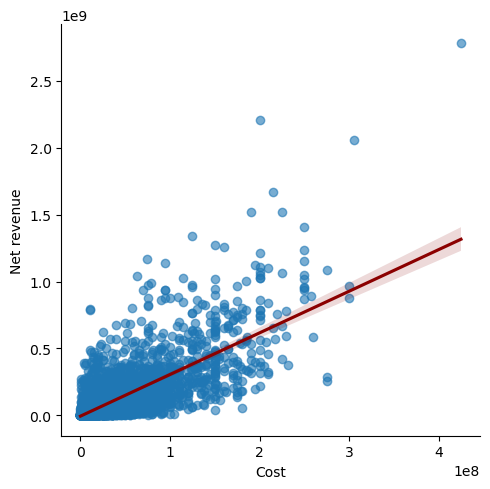

In [483]:
sns.lmplot(x='Cost'  , y= 'Net revenue' ,  data = New_data
          , scatter_kws={'alpha' : 0.6 } , line_kws ={'color':'darkred'}  )

regr = LinearRegression()

regr.fit(x,y)

print('Intercept : ' , regr.intercept_)
print('R-square : ' , regr.score(x,y))

predictedCO2 = regr.predict([[118 , 13 , 1]])

print(predictedCO2)


print(regr.coef_)

# Data Transformation

In [427]:
y.skew()

Net revenue    3.506488
dtype: object

In [428]:
y.dtypes

Net revenue    object
dtype: object

In [429]:
# change data type from object to numbers (int)

y['Net revenue'] = pd.to_numeric(y['Net revenue'])
print (y.dtypes)


Net revenue    int64
dtype: object


C:\Users\muham\AppData\Local\Temp\ipykernel_28644\246824000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Net revenue'] = pd.to_numeric(y['Net revenue'])


In [430]:
y_log = np.log(y)
y_log

,Net revenue
0,16.118096
2,15.894952
3,14.914123
4,16.213406
5,16.012735
...,...
5378,18.555509
5379,18.337616
5380,18.939789
5381,17.483551


In [431]:
y_log.skew()

Net revenue   -1.325531
dtype: float64

C:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'log price with skewNet revenue   -1.325531\ndtype: float64')

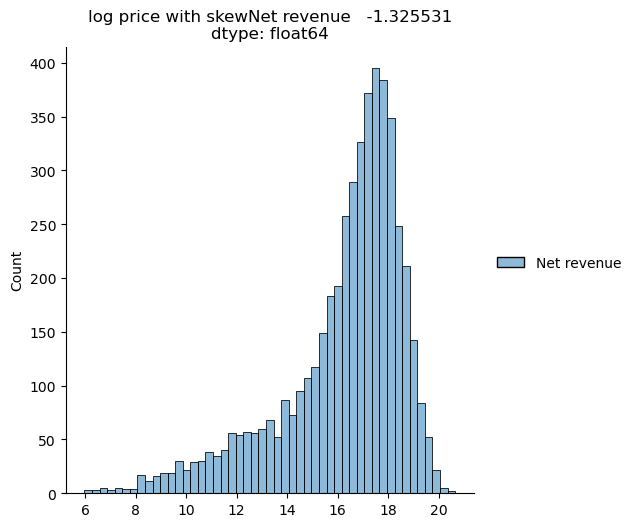

In [432]:
sns.displot(y_log)
plt.title(f'log price with skew{y_log.skew()}')

In [461]:
New_data = pd.concat([x, y], ignore_index=True)  #  Merge 2 data frames




In [473]:
New_data = New_data.apply(pd.to_numeric, errors='ignore')


In [468]:
# Change Rows
New_data['Gross revenue'] = New_data['Gross revenue'].str.replace(',', '')
New_data['Gross revenue'] = New_data['Gross revenue'].str.replace('$', '')

New_data['Cost'] = New_data['Cost'].str.replace(',', '')
New_data['Cost'] = New_data['Cost'].str.replace('$', '')
New_data['Net revenue'] = New_data['Net revenue'].str.replace(',', '') 
New_data['Net revenue'] = New_data['Net revenue'].str.replace('$', '')

C:\Users\muham\AppData\Local\Temp\ipykernel_28644\620758438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_data['Gross revenue'] = New_data['Gross revenue'].str.replace(',', '')
C:\Users\muham\AppData\Local\Temp\ipykernel_28644\620758438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_data['Gross revenue'] = New_data['Gross revenue'].str.replace('$', '')
C:\Users\muham\AppData\Local\Temp\ipykernel_28644\620758438.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

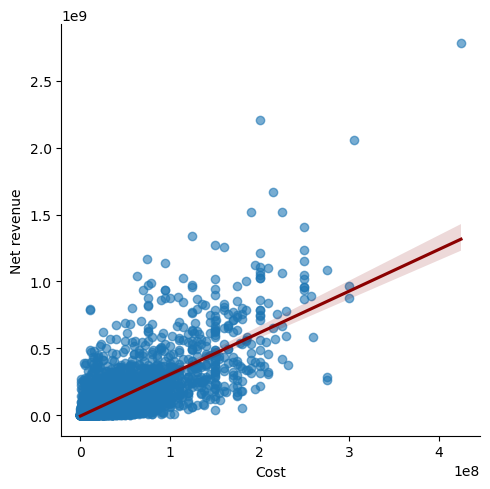

In [475]:
#  Plot of the original data

sns.lmplot(x ='Cost' , y= 'Net revenue' ,  data = New_data 
          , scatter_kws={'alpha' : 0.6 } , line_kws ={'color':'darkred'} )

# Log(Y) ->  to decrease the skewness in the data scatter 

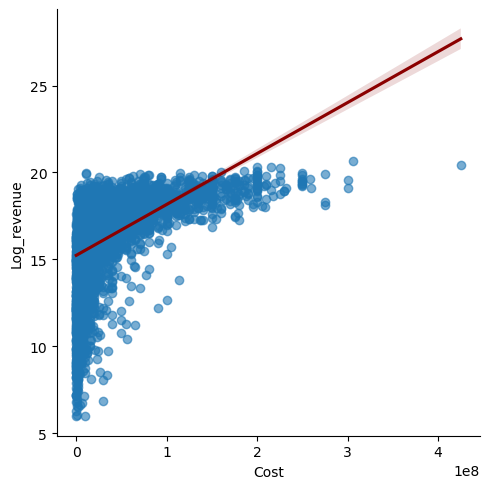

In [478]:
## Plot of Transformed data (Log Data)

transformed_data = New_data
transformed_data['Log_revenue']  = y_log
sns.lmplot(x='Cost'  ,y= 'Log_revenue' ,  data = transformed_data 
          , scatter_kws={'alpha' : 0.6 } , line_kws ={'color':'darkred'}  )

In [479]:
transformed_data

,Rank,Cost,Gross revenue,Net revenue,Log_revenue
0,5293,110000,10000000,11000000,16.118096
2,5230,200000,8000000,8000000,15.894952
3,5299,100000,3000000,3000000,14.914123
4,5222,245000,11000000,22000000,16.213406
5,4250,3900000,9000000,9000000,16.012735
...,...,...,...,...,...
5378,914,55000000,114434010,376856949,18.555509
5379,1295,40000000,92029184,166893990,18.337616
5380,70,185000000,168052812,561137727,18.939789
5381,94,175000000,39175066,140012608,17.483551


## Regression Using log Function 

In [484]:
Ab_log = np.log(New_data['Net revenue'])


regr = LinearRegression()

regr.fit(x,Ab_log)

print('Intercept : ' , regr.intercept_)
print('R-square : ' , regr.score(x ,Ab_log))




print(regr.coef_) 

Intercept :  4.633725982794505
R-square :  0.8911671351480854
[-2.78443014e-04 -4.17918150e-09  1.68750848e-09  7.96077851e-01]


## Train test split

In [ ]:
from sklearn.model_selection import train_test_split


In [581]:
Ab_log = np.log(New_data['Net revenue'])

x_train , x_test  , y_train  , y_test  = train_test_split(x_a , y_a ,
                                                          test_size = 0.2 , random_state = 10 )

regr = LinearRegression()

regr.fit(x_train , y_train)

print('R-square : ' , regr.score(x_train , y_train))
print('R-square : ' , regr.score(x_test , y_test))

print('Intercept : ' , regr.intercept_)

#pd.DataFrame(data =  regr.coef_  , index = x_train.columns , columns = ['coef'] )
print(regr.coef_)

R-square :  0.9006603680343882
R-square :  0.9282332672796543
Intercept :  -87560859.46650916
[1.81668744e+04 1.36337773e+00 2.04548751e+00]


In [491]:
np.e**1.0


2.718281828459045

In [ ]:
## every increase in Transportation Expenses for 1.0127 %  causes 1 Absence  

## P-value & Evaluating Coefficients 

In [495]:
import statsmodels.api as sm

In [578]:

x_include_constant = sm.add_constant(x_train)

model =  sm.OLS(y_train,x_include_constant.astype(float))

results = model.fit()

#results.params
#results.pvalues

num_Coef_P_val = pd.DataFrame({'coef' : results.params  , 'P-value' : round(results.pvalues, 3 )})


# P-v  > 0.05  (it's not significant )it means we can drop this from our model 

In [579]:
num_Coef_P_val

,coef,P-value
const,-5.970899e+07,0.000
Rank,-1.025241e+03,0.026
Cost,-1.590070e-01,0.000
Gross revenue,3.530710e-01,0.000
Log_revenue,4.860809e+06,0.000


## Testing for Multicollinearity With VIF 

$$ Tax = \alpha_0 + \alpha_2 NOX +  \alpha_{12}LSTAT $$ 

$$ VIF_ {TAX} = \frac{1}{(1-R_{TAX} ^ 2 ) } $$

In [252]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(exog =  x_include_constant , exog_idx = i ) 
      for i in range (x_include_constant.shape[1])]
num_vif = pd.DataFrame({'Coef_name': x_include_constant.columns , 'vif' : np.around(vif,2)  } ) 


##  Vif >= 5  we will not include this variable for our regression 
##   Vif  < 5  we will include that 

In [522]:
vif_data = pd.DataFrame() 
vif_data["Variables"] = New_data.columns 
vif_data["VIF"] = [variance_inflation_factor(New_data.values, i) 
                          for i in range(len(New_data.columns))] 

In [523]:
vif_data

,Variables,VIF
0,Rank,6.524296
1,Cost,6.418395
2,Gross revenue,13.680456
3,Net revenue,14.311434
4,Log_revenue,12.886539


## Model sipolification with BIC 

###### A lower BIC value indicates a better fit. 

#### a higher R-squared indicates the model is a good fit

In [597]:
# Modeel number 1 full data



x_include_constant = sm.add_constant(x_train)

model =  sm.OLS(y_train,x_include_constant)

results = model.fit()

#results.params
#results.pvalues

num_BIC1 = pd.DataFrame({'coef' : results.params  , 'P-value' : np.round(results.pvalues , 5) } )

print('BIC is ', results.bic)
print('R-square is ' , results.rsquared)

print(num_BIC1)

# P-v  > 0.05  (it's not significant )it means we can drop this from our model 

BIC is  150202.6555087084
R-square is  0.9006603680343882
           coef  P-value
0 -8.756086e+07      0.0
1  1.816687e+04      0.0
2  1.363378e+00      0.0
3  2.045488e+00      0.0


In [598]:
num_BIC1

,coef,P-value
0,-8.756086e+07,0.0
1,1.816687e+04,0.0
2,1.363378e+00,0.0
3,2.045488e+00,0.0


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [61]:
# Modeel number 2 dropped Reason for Absence , Age , Daily Work Load Average , 
# Absenteeism Time in Hours  , Children	

x_include_constant = sm.add_constant(x_train)
x_include_constant = x_include_constant.drop(['Children','Age' , 'Reason for Absence' , 
                                             'Daily Work Load Average' , 'Absenteeism Time in Hours'
                                             ] , axis = 1)


model =  sm.OLS(y_train,x_include_constant)

results = model.fit()

#results.params
#results.pvalues

num_BIC2 = pd.DataFrame({'coef' : results.params  , 'P-value' : round(results.pvalues ,3) } )

print('BIC is ', results.bic)
print('BIC is ' , results.rsquared)

# P-v  > 0.05  (it's not significant )it means we can drop this from our model 

BIC is  1244.1170028804634
BIC is  0.45133380460285877


In [ ]:
frames  =  [num_Coef_P_val , num_BIC1, num_BIC2 ]
pd.concat(frames , axis = 1)

## Residuals & Residual Plots 

In [62]:
# Modified Model : Transformed (Using log & Drop Two features)

x =  data.drop(['Children','Age' , 'Reason for Absence' ,
                'Daily Work Load Average' , 'Absenteeism Time in Hours'
                                             ] , axis = 1)
y = np.log(data['ID'])

Absence_log = np.log(data['ID'])

x_train , x_test  , y_train  , y_test  = train_test_split(feature , Absence_log ,
                                                          test_size = 0.2 , random_state = 10 )

# using stats model

x_include_constant = sm.add_constant(x_train)
model =  sm.OLS(y_train,x_include_constant)
results = model.fit()

# Reseduals 
#calculate Reseduals  Manually 

reseduals =  y_train - results.fittedvalues 
reseduals
#  reseduals.describe()



16    -0.495005
280   -0.477984
353   -1.857930
374   -0.487474
300   -0.018675
         ...   
369    0.480519
320    0.387968
527   -1.218177
125    0.497866
265   -1.825074
Length: 560, dtype: float64

## Modified model Using Log 

Text(0.5, 1.0, 'actual vs predicted log prices $y _i$ vs $\\hat y _i$  (correlation 0.96) ')

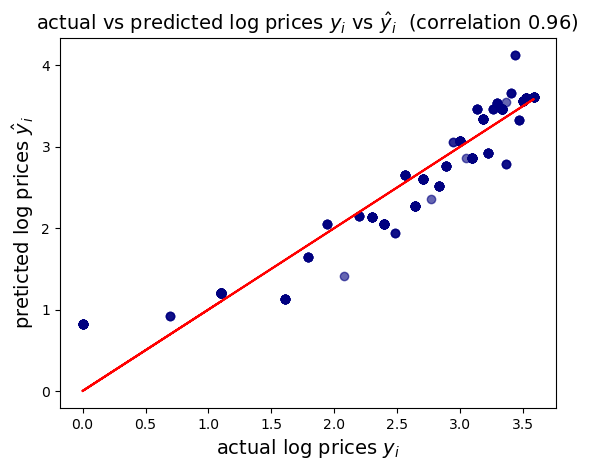

In [63]:
# Modified Model : Transformed (Using log & Drop Two features)

x_log =  (data.drop(['Date','Children','Age' , 'Reason for Absence' ,
                       'Daily Work Load Average' , 'Absenteeism Time in Hours'] , axis = 1))
y_log = np.log(data['ID'])



x_train , x_test  , y_train  , y_test  = train_test_split(x_log , y_log ,
                                                          test_size = 0.2 , random_state = 10 )

# using stats model

x_include_constant = sm.add_constant(x_train)
model =  sm.OLS(y_train , x_include_constant)
results = model.fit()

# Reseduals 
#calculate Reseduals  Manually 

# reseduals =  y_train - results.fittedvalues 
results.resid
#  reseduals.describe()

#--------------------------------------------------------------------

# Graph of actual vs predicted prices 

corr = round(y_train.corr(results.fittedvalues)  , 2)

plt.scatter(x=y_train , y = results.fittedvalues , c = 'navy' , alpha = 0.6 )
plt.plot(y_train, y_train , c='red')

plt.xlabel('actual log prices $y _i$' ,fontsize = 14 )
plt.ylabel('preticted log prices $\hat y  _i$' ,fontsize = 14 )
plt.title(f'actual vs predicted log prices $y _i$ vs $\hat y _i$  (correlation {corr}) ',fontsize = 14 )

#---------------------------------------------------------------------------------



In [ ]:
x.dropna(inplace=True)

Text(0.5, 1.0, 'actual vs predicted  prices $y _i$ vs $\\hat y _i$  (correlation 0.96) ')

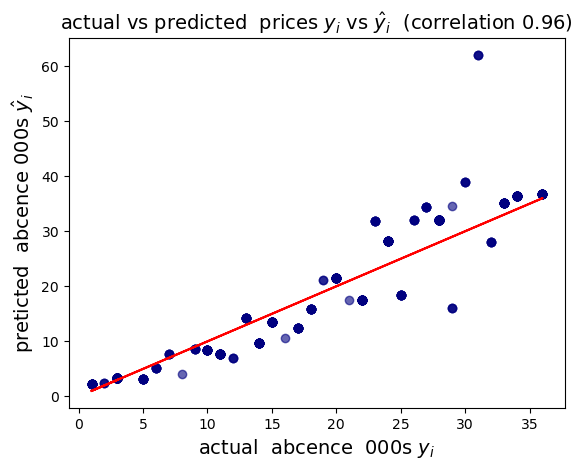

In [64]:
plt.scatter(x = np.e**y_train , y = np.e**results.fittedvalues , c = 'navy' , alpha = 0.6 )
plt.plot(np.e**y_train, np.e**y_train , c='red')

plt.xlabel('actual  abcence  000s $y _i$' ,fontsize = 14 )
plt.ylabel('preticted  abcence 000s $\hat y  _i$' ,fontsize = 14 )
plt.title(f'actual vs predicted  prices $y _i$ vs $\hat y _i$  (correlation {corr}) ',fontsize = 14 )


Text(0.5, 1.0, 'Rediduals vs fitted values log prices $y _i$ vs $\\hat y _i$  (correlation 0.96) ')

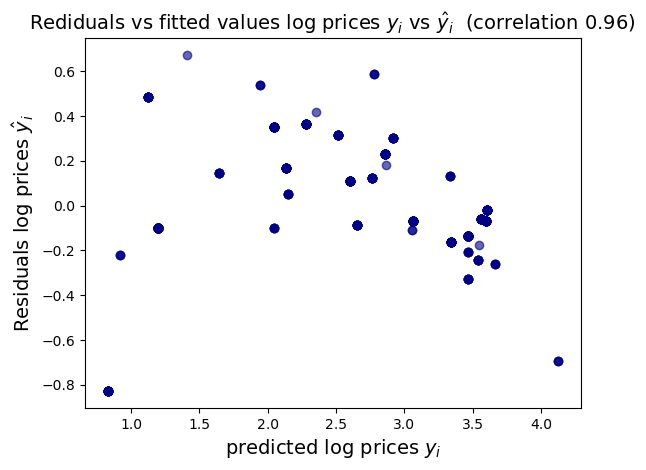

In [65]:
plt.scatter(x=  results.fittedvalues , y = results.resid , c = 'navy' , alpha = 0.6 )

plt.xlabel('predicted log prices $y _i$' ,fontsize = 14 )
plt.ylabel('Residuals log prices $\hat y  _i$' ,fontsize = 14 )
plt.title(f'Rediduals vs fitted values log prices $y _i$ vs $\hat y _i$  (correlation {corr}) ',fontsize = 14 )


In [71]:
# (log prices ) - checking for normality :
#----------------------------------------

resid_mean  = round(results.resid.mean() , 3)
resid_skew = round(results.resid.skew() , 3 ) 

sns.displot(results.resid , color='navy)
plt.title(f'log price model : residuals skew : ({res id_skew}) mean :({resid_mean}) ')
plt.show()

SyntaxError: unterminated string literal (detected at line 7) (3138733812.py, line 7)

C:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


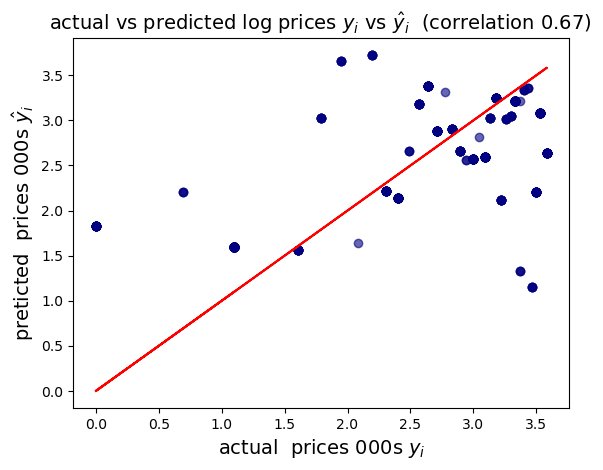

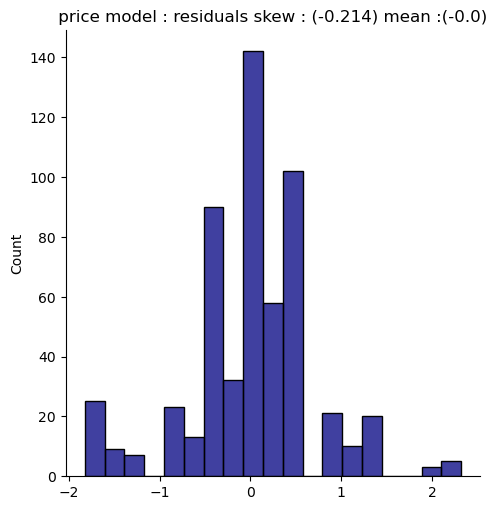

Text(0.5, 1.0, 'actual vs predicted  prices $y _i$ vs $\\hat y _i$  (correlation 0.67) ')

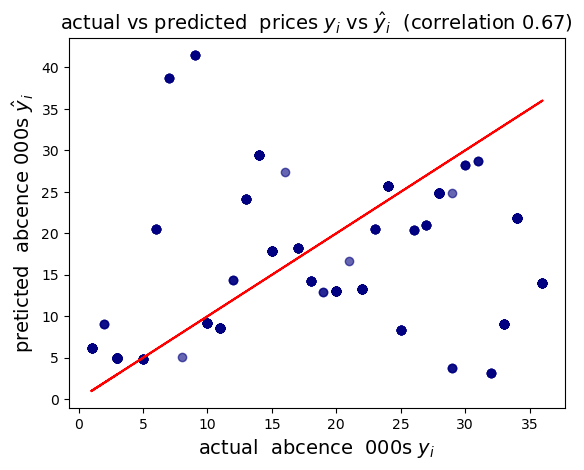

In [107]:
# Modified Model : Transformed (Using log & Drop Two features)

x =  (data.drop(['Date','ID','Children','Age' , 'Reason for Absence' ,
                'Daily Work Load Average' , 'Absenteeism Time in Hours'
                                             ] , axis = 1))
y = np.log(data['ID'])

Absence_log = np.log(data['ID'])

x_train , x_test  , y_train  , y_test  = train_test_split(x , y ,
                                                          test_size = 0.2 , random_state = 10 )

# using stats model

x_include_constant = sm.add_constant(x_train)
model =  sm.OLS(y_train,x_include_constant)
results = model.fit()

corr = round(y_train.corr(results.fittedvalues)  , 2)


plt.scatter(x=y_train , y = results.fittedvalues , c = 'navy' , alpha = 0.6 )
plt.plot(y_train, y_train , c='red')

plt.xlabel('actual  prices 000s $y _i$' ,fontsize = 14 )
plt.ylabel('preticted  prices 000s $\hat y  _i$' ,fontsize = 14 )
plt.title(f'actual vs predicted log prices $y _i$ vs $\hat y _i$  (correlation {corr}) ',fontsize = 14 )

# residual distribution 
#-----------------------

resid_mean  = round(results.resid.mean() , 3)
resid_skew = round(results.resid.skew() , 3 ) 

sns.displot(results.resid , color='navy')
plt.title(f' price model : residuals skew : ({resid_skew}) mean :({resid_mean}) ')
plt.show()

#----------------------------------------------------------------

plt.scatter(x = np.e**y_train , y = np.e**results.fittedvalues , c = 'navy' , alpha = 0.6 )
plt.plot(np.e**y_train, np.e**y_train , c='red')

plt.xlabel('actual  abcence  000s $y _i$' ,fontsize = 14 )
plt.ylabel('preticted  abcence 000s $\hat y  _i$' ,fontsize = 14 )
plt.title(f'actual vs predicted  prices $y _i$ vs $\hat y _i$  (correlation {corr}) ',fontsize = 14 )


## mean Squared Error

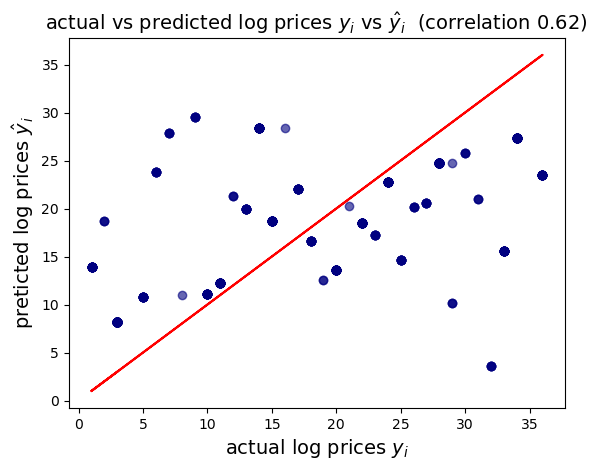

C:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


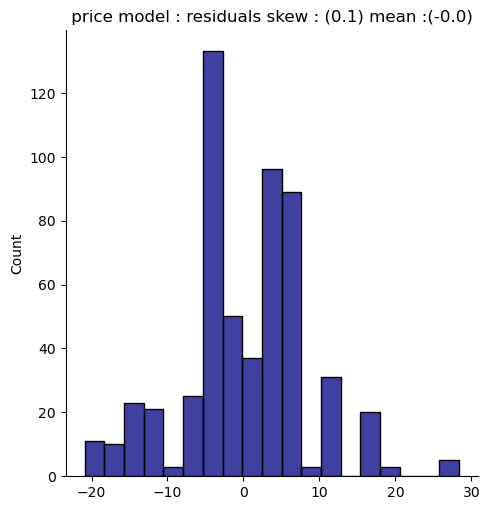

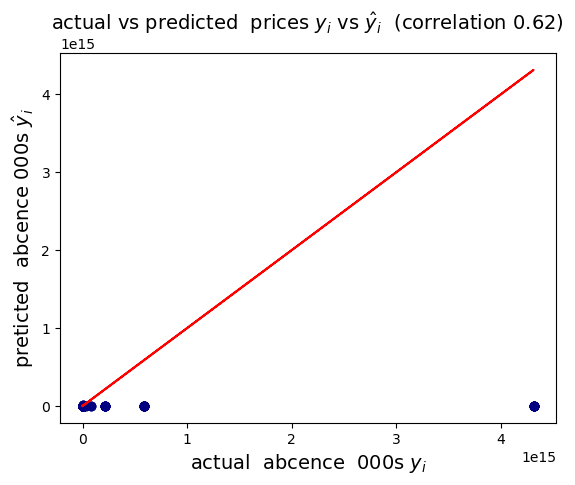

In [108]:
# Omitted model : Dropped omitted values

x =  (data.drop(['Date','ID','Children','Age' , 'Reason for Absence' ,
                'Daily Work Load Average' , 'Absenteeism Time in Hours'
                                             ] , axis = 1))
# Original Model : 
#-----------------


y = (data['ID'])

x_train , x_test  , y_train  , y_test  = train_test_split(x , y ,
                                                          test_size = 0.2 , random_state = 10 )

# using stats model
#-------------------

x_include_constant = sm.add_constant(x_train)
model =  sm.OLS(y_train , x_include_constant)
results = model.fit()

# Reseduals 
#----------
                        #calculate Reseduals  Manually 
                        # reseduals =  y_train - results.fittedvalues 

results.resid

                            #  reseduals.describe()
#------------------------------------------------------------
#Skew & mean 
#-----------

resid_mean  = round(results.resid.mean() , 3)
resid_skew = round(results.resid.skew() , 3 ) 


#correlation
#_----------

corr = round(y_train.corr(results.fittedvalues)  , 2)



#--------------------------------------------------------------------

# Graph of actual vs predicted prices 


plt.scatter(x=y_train , y = results.fittedvalues , c = 'navy' , alpha = 0.6 )
plt.plot(y_train, y_train , c='red')

plt.xlabel('actual log prices $y _i$' ,fontsize = 14 )
plt.ylabel('preticted log prices $\hat y  _i$' ,fontsize = 14 )
plt.title(f'actual vs predicted log prices $y _i$ vs $\hat y _i$  (correlation {corr}) ',fontsize = 14 )

plt.show()

#---------------------------------------------------------------------------------

sns.displot(results.resid , color='navy')
plt.title(f' price model : residuals skew : ({resid_skew}) mean :({resid_mean}) ')
plt.show()

#----------------------------------------------------------------

plt.scatter(x = np.e**y_train , y = np.e**results.fittedvalues , c = 'navy' , alpha = 0.6 )
plt.plot(np.e**y_train, np.e**y_train , c='red')

plt.xlabel('actual  abcence  000s $y _i$' ,fontsize = 14 )
plt.ylabel('preticted  abcence 000s $\hat y  _i$' ,fontsize = 14 )
plt.title(f'actual vs predicted  prices $y _i$ vs $\hat y _i$  (correlation {corr}) ',fontsize = 14 )

## Mean squared error & R-squared
#---------------------------------

omitted_mse = round(results.mse_resid , 3)

omitted_Rsquared = round(results.rsquared , 3)





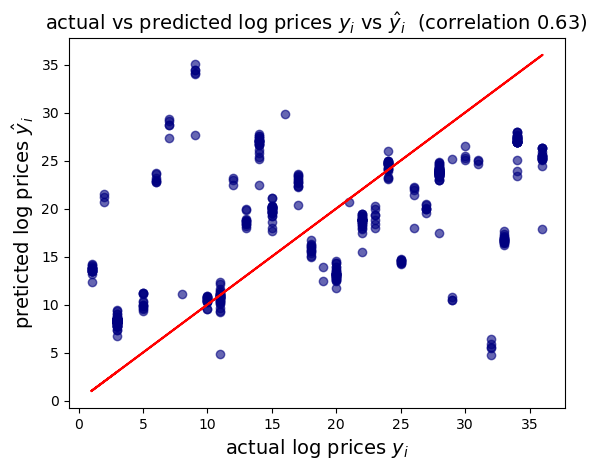

C:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


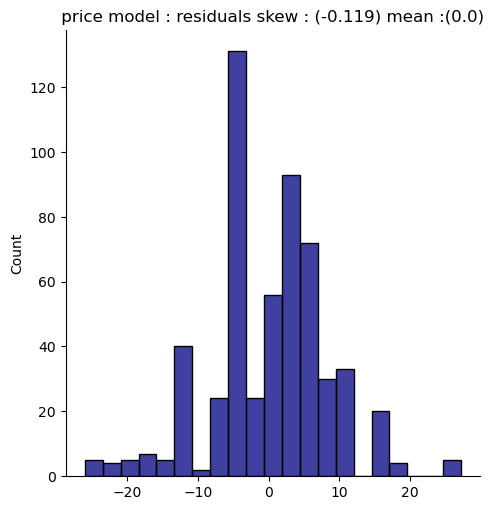

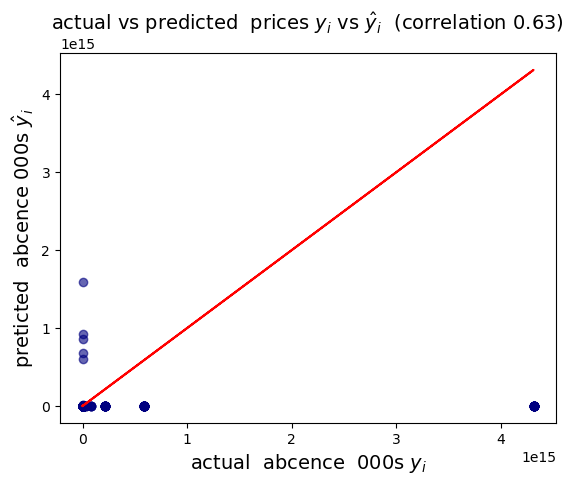

In [114]:
# Original Model : 
#-----------------

x =  (data.drop(['Date','ID'] , axis = 1))
y = (data['ID'])

x_train , x_test  , y_train  , y_test  = train_test_split(x , y ,
                                                          test_size = 0.2 , random_state = 10 )

# using stats model
#-------------------

x_include_constant = sm.add_constant(x_train)
model =  sm.OLS(y_train , x_include_constant)
results = model.fit()

# Reseduals 
#----------
                        #calculate Reseduals  Manually 
                        # reseduals =  y_train - results.fittedvalues 

results.resid

                            #  reseduals.describe()
#------------------------------------------------------------
#Skew & mean 
#-----------

resid_mean  = round(results.resid.mean() , 3)
resid_skew = round(results.resid.skew() , 3 ) 


#correlation
#_----------

corr = round(y_train.corr(results.fittedvalues)  , 2)



#--------------------------------------------------------------------

# Graph of actual vs predicted prices 


plt.scatter(x=y_train , y = results.fittedvalues , c = 'navy' , alpha = 0.6 )
plt.plot(y_train, y_train , c='red')

plt.xlabel('actual log prices $y _i$' ,fontsize = 14 )
plt.ylabel('preticted log prices $\hat y  _i$' ,fontsize = 14 )
plt.title(f'actual vs predicted log prices $y _i$ vs $\hat y _i$  (correlation {corr}) ',fontsize = 14 )

plt.show()

#---------------------------------------------------------------------------------

sns.displot(results.resid , color='navy')
plt.title(f' price model : residuals skew : ({resid_skew}) mean :({resid_mean}) ')
plt.show()

#----------------------------------------------------------------

plt.scatter(x = np.e**y_train , y = np.e**results.fittedvalues , c = 'navy' , alpha = 0.6 )
plt.plot(np.e**y_train, np.e**y_train , c='red')

plt.xlabel('actual  abcence  000s $y _i$' ,fontsize = 14 )
plt.ylabel('preticted  abcence 000s $\hat y  _i$' ,fontsize = 14 )
plt.title(f'actual vs predicted  prices $y _i$ vs $\hat y _i$  (correlation {corr}) ',fontsize = 14 )

## Mean squared error & R-squared
#---------------------------------

original_mse = round(results.mse_resid , 3)

original_Rsquared = round(results.rsquared , 3)


C:\Users\muham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


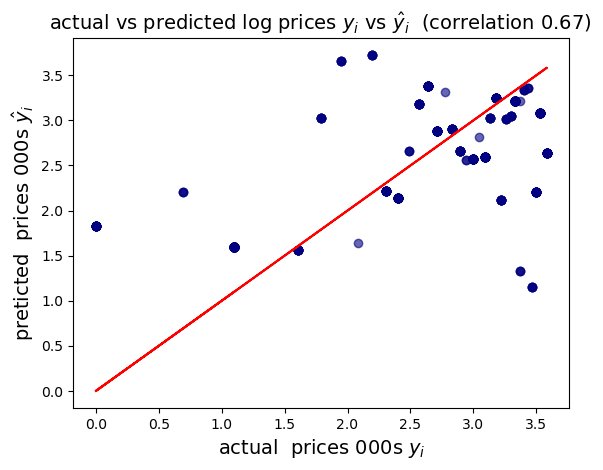

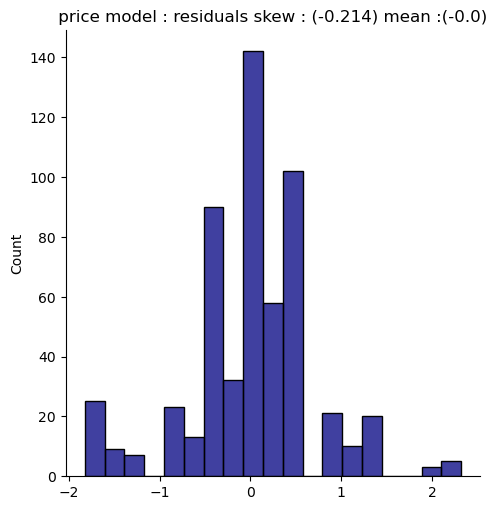

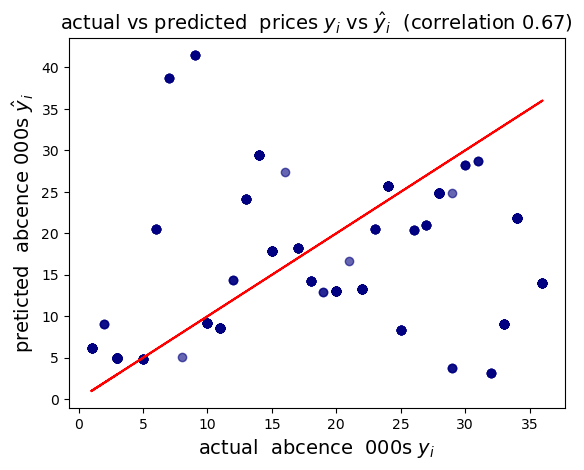

In [113]:
# Modified Model : Transformed (Using log & Drop Two features)

x =  (data.drop(['Date','ID','Children','Age' , 'Reason for Absence' ,
                'Daily Work Load Average' , 'Absenteeism Time in Hours'
                                             ] , axis = 1))
y = np.log(data['ID'])

Absence_log = np.log(data['ID'])

x_train , x_test  , y_train  , y_test  = train_test_split(x , y ,
                                                          test_size = 0.2 , random_state = 10 )

# using stats model

x_include_constant = sm.add_constant(x_train)
model =  sm.OLS(y_train,x_include_constant)
results = model.fit()

corr = round(y_train.corr(results.fittedvalues)  , 2)


plt.scatter(x=y_train , y = results.fittedvalues , c = 'navy' , alpha = 0.6 )
plt.plot(y_train, y_train , c='red')

plt.xlabel('actual  prices 000s $y _i$' ,fontsize = 14 )
plt.ylabel('preticted  prices 000s $\hat y  _i$' ,fontsize = 14 )
plt.title(f'actual vs predicted log prices $y _i$ vs $\hat y _i$  (correlation {corr}) ',fontsize = 14 )

# residual distribution 
#-----------------------

resid_mean  = round(results.resid.mean() , 3)
resid_skew = round(results.resid.skew() , 3 ) 

sns.displot(results.resid , color='navy')
plt.title(f' price model : residuals skew : ({resid_skew}) mean :({resid_mean}) ')
plt.show()

#----------------------------------------------------------------

plt.scatter(x = np.e**y_train , y = np.e**results.fittedvalues , c = 'navy' , alpha = 0.6 )
plt.plot(np.e**y_train, np.e**y_train , c='red')

plt.xlabel('actual  abcence  000s $y _i$' ,fontsize = 14 )
plt.ylabel('preticted  abcence 000s $\hat y  _i$' ,fontsize = 14 )
plt.title(f'actual vs predicted  prices $y _i$ vs $\hat y _i$  (correlation {corr}) ',fontsize = 14 )


## Mean squared error & R-squared
#---------------------------------

Logged_mse = round(results.mse_resid , 3)

Logged_Rsquared = round(results.rsquared , 3)


In [126]:
pd.DataFrame({'R-squared': [original_Rsquared  , omitted_Rsquared , Logged_Rsquared] ,
             'MSE': [original_mse , omitted_mse , Logged_mse ] 
                     , 'RMSE' : np.sqrt([original_mse , omitted_mse , Logged_mse]) }
            ,index = ['Original model' , 'omitted model ' , 'logged model'] )

# R-squared is always between 0 and 1 
# mse is 

,R-squared,MSE,RMSE
Original model,0.400,73.041,8.546403
omitted model,0.384,74.283,8.618759
logged model,0.451,0.510,0.714143


In [137]:
# Our estimate for a price is $ 30,000  . calculate the upper and lower bound
# for a 95%  prediction  

print('1 s.d. in log prices is ' , np.sqrt(Logged_mse))
print('2 s.d. in log prices is ' , 2*np.sqrt(Logged_mse))


upper_bound = np.log(30) + 2*np.sqrt(Logged_mse)
print('the upper bound in log prices for 95% prediction interval is ' , upper_bound)
print('the upper bound in normal prices for 95% prediction interval is $' , np.e**upper_bound * 1000)


lower_bound = np.log(30) - 2*np.sqrt(Logged_mse)
print('the lower bound in log prices for 95% prediction interval is ' , lower_bound)
print('the lower bound in normal prices for 95% prediction interval is $' , np.e**lower_bound * 1000)

1 s.d. in log prices is  0.714142842854285
2 s.d. in log prices is  1.42828568570857
the upper bound in log prices for 95% prediction interval is  4.829483067370726
the upper bound in normal prices for 95% prediction interval is $ 125146.25175017297
the lower bound in log prices for 95% prediction interval is  1.9729116959535855
the lower bound in normal prices for 95% prediction interval is $ 7191.585743987383


In [138]:
30000 + np.e**(2*np.sqrt(Logged_mse)) *1000 

34171.541725005765

In [42]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])


In [43]:
arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [57]:
ar = arr.reshape(3,3)

ValueError: cannot reshape array of size 12 into shape (3,3)

In [56]:
ar

array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6]],

       [[ 7,  8],
        [ 9, 10],
        [11, 12]]])